In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30
plt.rcParams["font.family"] = "NanumGothic"


# 데이터 불러오기
- train 데이터 구조 : (3000,24)
- test 데이터 구조 : (2000,23)

In [3]:
import pandas as pd

train = pd.read_csv("./train.csv")
#train = train.drop(columns = ["id"], axis = 1)


test = pd.read_csv("./test.csv")
#test = test.drop(columns = ["id"], axis = 1)

submission = pd.read_csv("./sample_submission.csv")

print(f'train set은 {train.shape[1]} 개의 feature를 가진 {train.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')
print(train.shape)
train.head()

train set은 24 개의 feature를 가진 3000 개의 데이터 샘플로 이루어져 있습니다.
(3000, 24)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [4]:
print(f'test set은 {test.shape[1]} 개의 feature를 가진 {test.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')
print(test.shape)
test.head()

test set은 23 개의 feature를 가진 2000 개의 데이터 샘플로 이루어져 있습니다.
(2000, 23)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,...,5,5,5,5,5,3,5,3,51,58.0
1,2,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,...,1,1,3,4,5,4,4,1,0,0.0
2,3,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,...,4,5,5,5,5,4,5,3,0,0.0
3,4,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,...,5,2,2,2,2,5,2,1,0,0.0
4,5,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,...,4,4,3,1,2,5,4,4,0,0.0


In [5]:
numeric_features = train.columns[(train.dtypes == "float64") | (train.dtypes == "int64")]

categorical_features = train.columns[(train.dtypes == "O")]

print("수치형 데이터는 다음과 같습니다. \n ", list(numeric_features))
print("\n")
print("범주형 데이터는 다음과 같습니다. \n ", list(categorical_features))

수치형 데이터는 다음과 같습니다. 
  ['id', 'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target']


범주형 데이터는 다음과 같습니다. 
  ['Gender', 'Customer Type', 'Type of Travel', 'Class']


In [6]:
print(f"수치형 데이터 컬럼의 개수는 {len(numeric_features)}")
print(f"범주형 데이터 컬럼의 개수는 {len(categorical_features)}")

수치형 데이터 컬럼의 개수는 20
범주형 데이터 컬럼의 개수는 4


In [7]:
#결측치 있는지 확인하는 함수

def check_missing_col(dataframe):
    
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.\n')
            missing_col.append([col, dataframe[col].dtype])
    print(f'결측치가 있는 컬럼 의 개수는 {counted_missing_col} 입니다')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

    return missing_col




In [8]:
missing_col = check_missing_col(train)
print(missing_col)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다
[]


In [9]:
missing_col = check_missing_col(test)
print(missing_col)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다
[]


In [10]:
train.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,866.169729,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,1.000000,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1500.500000,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,2250.250000,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,3000.000000,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


In [11]:
def numeric_histogram(df) :
    
    plt.style.use("ggplot")

    # 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
    plt.figure(figsize=(25,20))
    
    plt.suptitle("numeric histogram", fontsize=40)

    # id는 제외하고 시각화합니다.
    cols = df.columns
    for i in range(len(cols)):
        plt.subplot(5,5,i+1)
        plt.title(cols[i], fontsize=20, color = "black")
        if len(df[cols[i]].unique()) > 20:
            plt.hist(df[cols[i]], bins=20, color='b', alpha=0.7)
        else:
            temp = df[cols[i]].value_counts()
            plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
            plt.xticks(temp.keys())
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

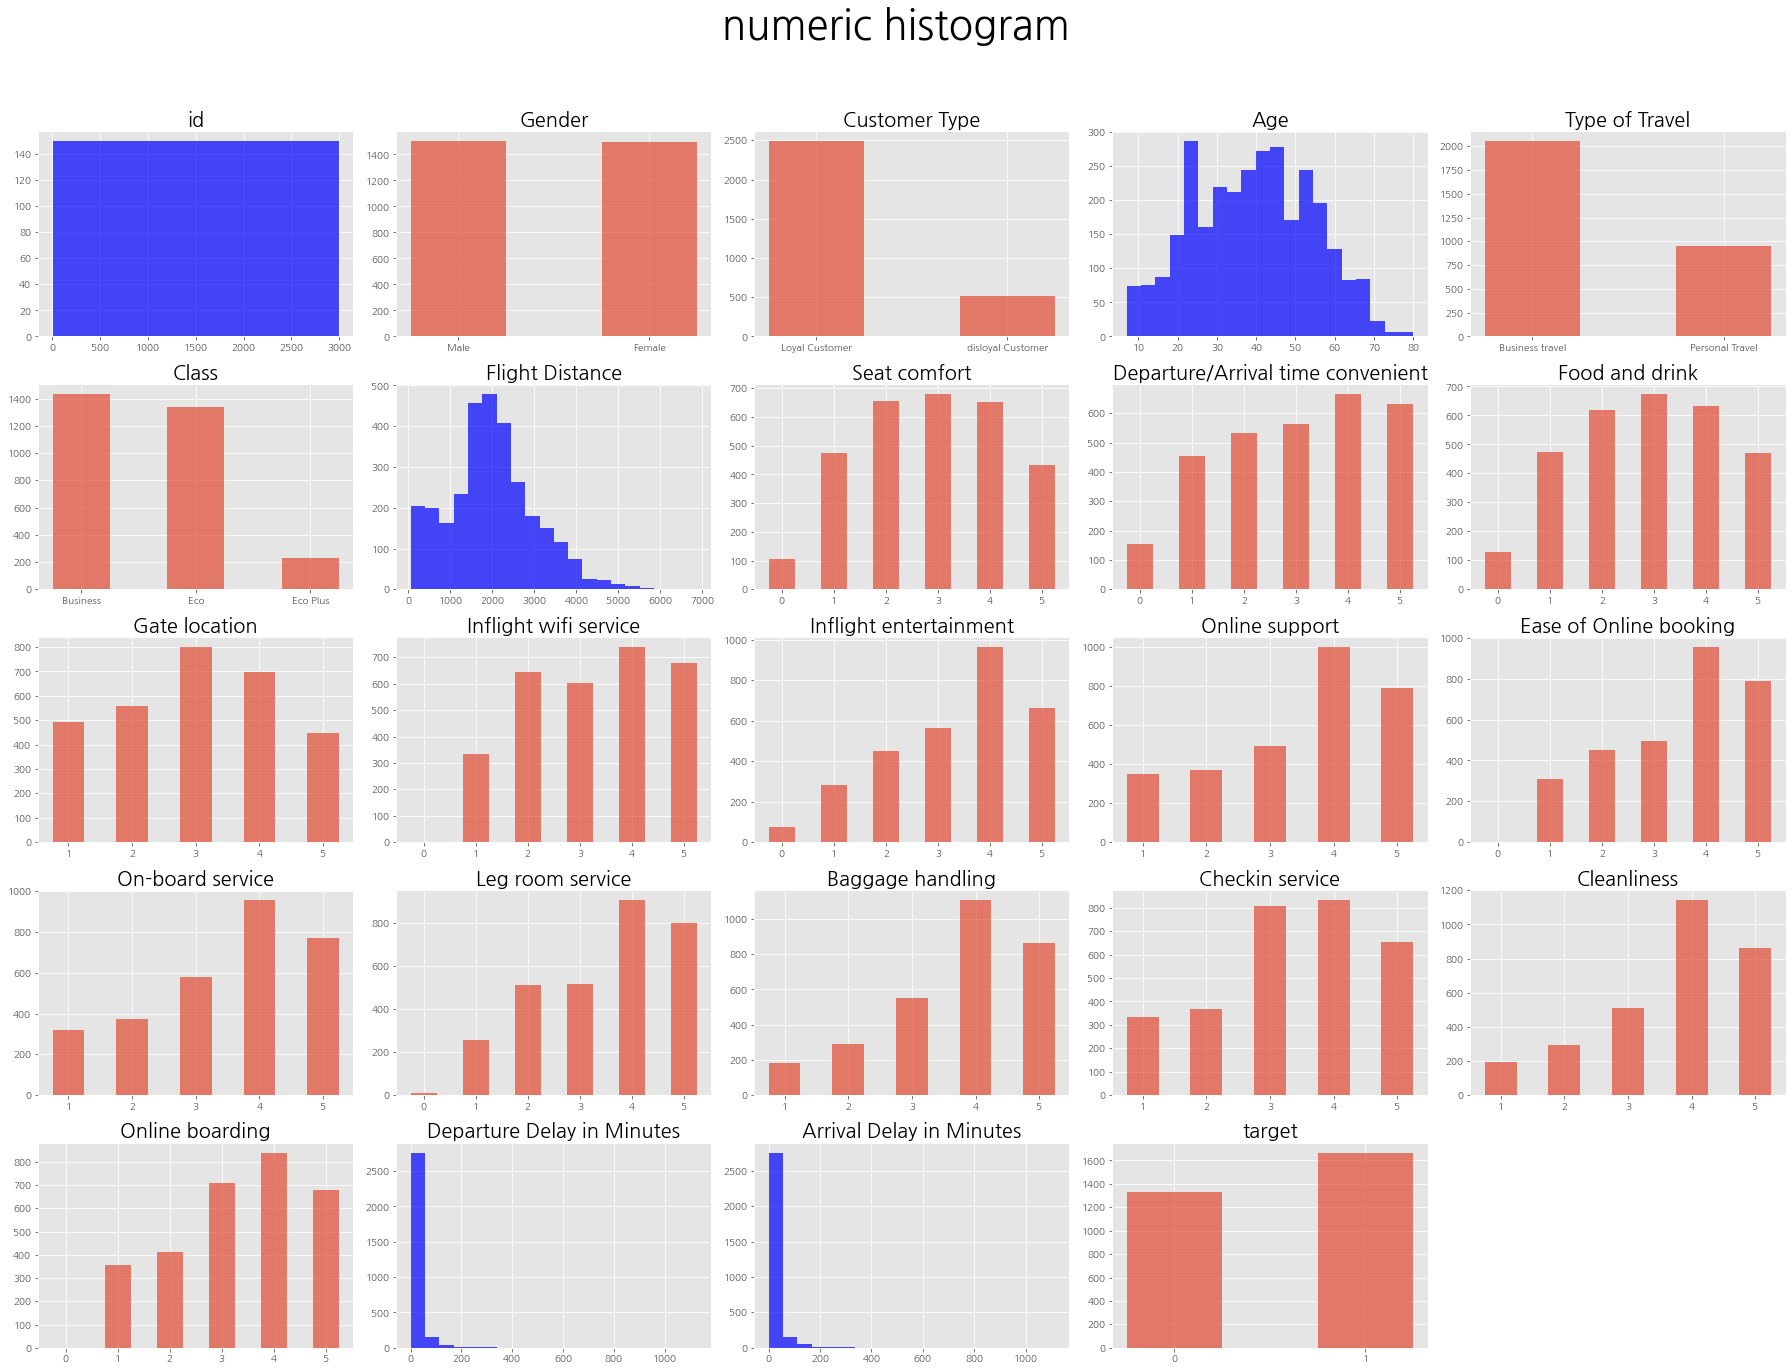

In [12]:
numeric_histogram(train)

### lastdefiance20 님 코드 참고
#  



데이터 훑어볼 때 두가지 우선적으로 살펴보기!
- 데이터의 분포가 상대적으로 매우 적은지 => 매우 적다면 범주를 합치거나 하는 등의 변환이 필요함
- 데이터의 분포가 극단적으로 치우쳐 있는지 => log 변환 등의 방법을 통해 정규화해주는 작업이 필요함  
#    


위의 일변량 그래프에서 주목해야할 점!
- Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 등의 그래프가 왼쪽으로 치우쳐져 있다는 점
- Leg room service 등 1~5를 가진 feature중에서 0값의 분포가 매우 적다는 점


#   
수치형 데이터 박스플랏
- Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes에 이상치들이 보임

In [13]:
def numeric_boxplots(df):
    
    plt.style.use("ggplot")

    feature = numeric_features

    # Boxplot을 이용해서 데이터의 분포 살펴보기

    plt.figure(figsize = (20,15))
    plt.suptitle("수치형데이터 - boxplot", fontsize = 40)

    for i in range(len(feature)) :
        plt.subplot(5,4,i+1)
        plt.title(feature[i], color = "black")
        plt.boxplot(df[feature[i]])
    plt.show()

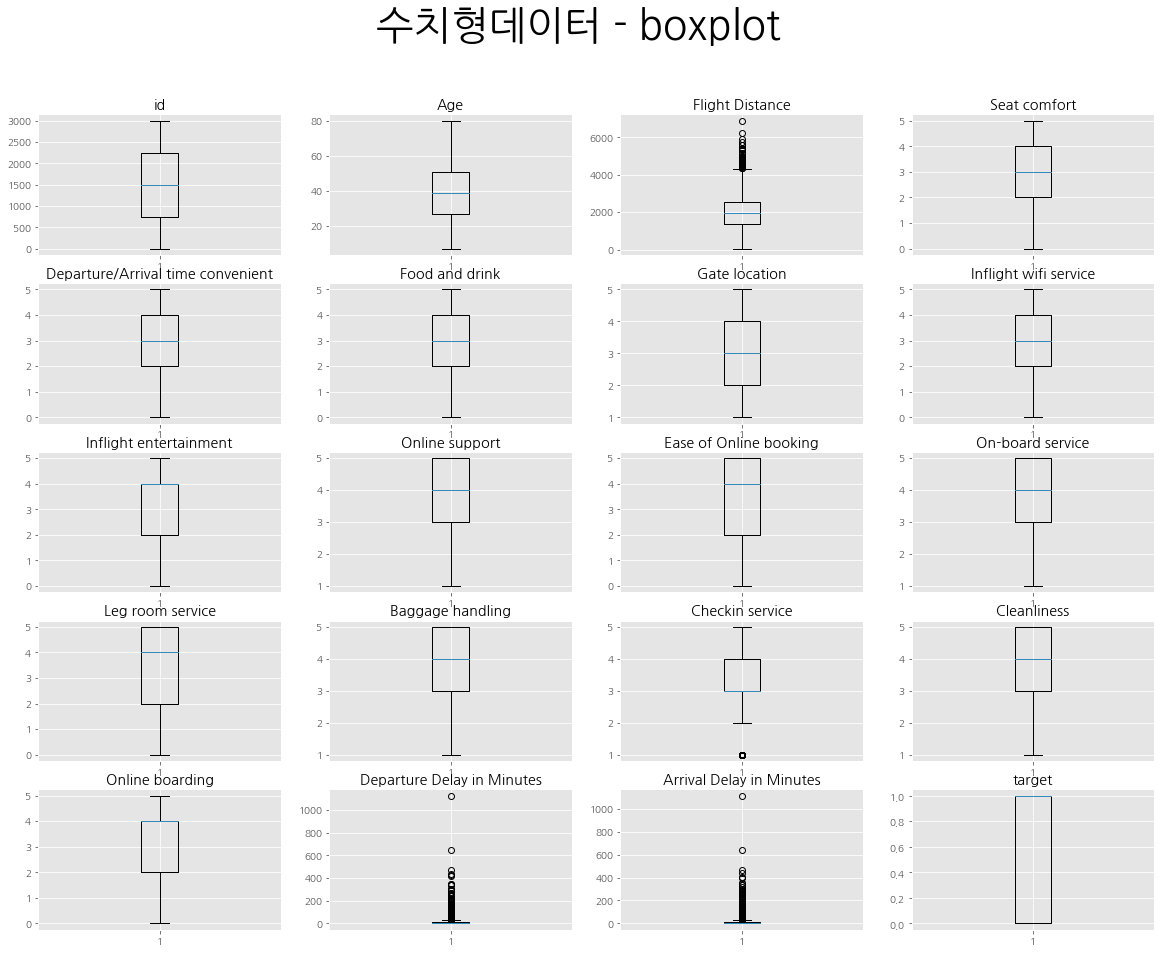

In [14]:
numeric_boxplots(train)

In [15]:
def numeric_vs_target(df):    
    
    # 수치형 데이터 분리
    #numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
    num_data = df[numeric_features]

    # 박스플롯
    fig, axes = plt.subplots(4, 5, figsize=(25, 20))

    fig.suptitle('feature distributions per quality', fontsize= 40)
    for ax, col in zip(axes.flat, num_data.columns[:-1]):
       
        sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
        ax.set_title(col, fontsize=20,color = "b")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

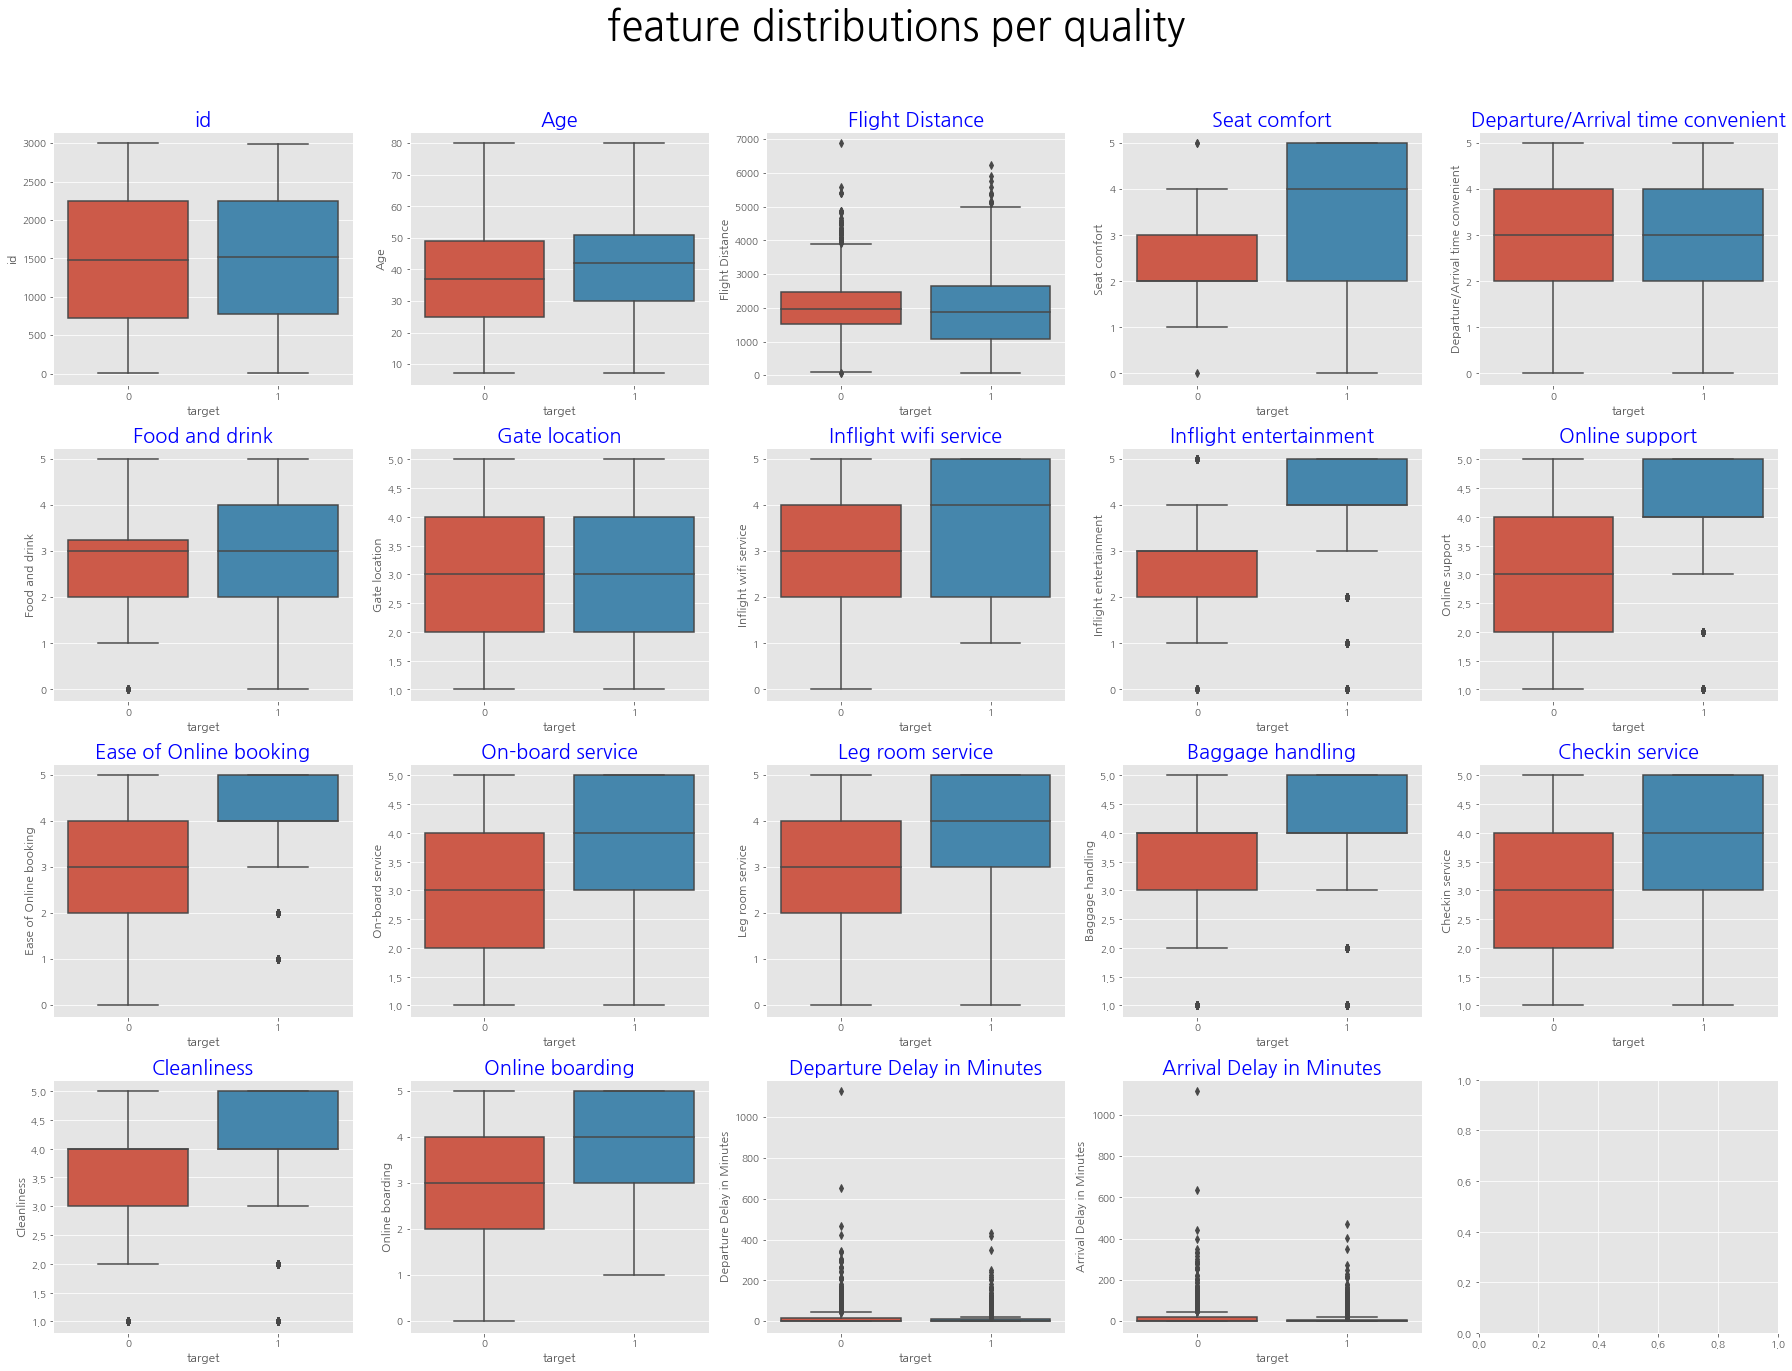

In [16]:
numeric_vs_target(train)

Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 등의 박스플롯이 고르지 않음
1~3개씩 이상치들이 있는 feature들이 보임

# 데이터 분류하기     
# 
     
## 데이터의 속성에 따라서 numeric, ordianl, categorical로 나누어 분류

numeric features = 숫자형 자료 => Flight Distance 등의 숫자형 데이터.

ordinal features = 순서형 자료 => Seat comfort 등 (매우만족 > 만족 > 보통 > 불만족 > 매우불만족)의 설문순서를 가진 데이터.

categorical features = 범주형 자료 => 남자 / 여자 등 범주별로 나눠진 데이터.

In [17]:
numeric_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_features = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
target_features = ["target"]

# 데이터 훑어보기     
# 

## feature / target 그래프로 target과 feature의 관계를 파악


In [18]:
def features_vs_target(df):    
    
    # 수치형 데이터 분리
    #numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
    #num_data = df[numeric_features]
    
    features = ordinal_features + categorical_features + target_features
    data = df[features]

    # 박스플롯
    fig, axes = plt.subplots(5, 4, figsize=(16, 22))

    fig.suptitle('feature / target', fontsize= 40)
    for ax, col in zip(axes.flat, data.columns[:-1]):
       
        sns.barplot(x= col, y= "target", ax=ax, data=data)
        ax.set_title(col, fontsize=20, color = "b")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

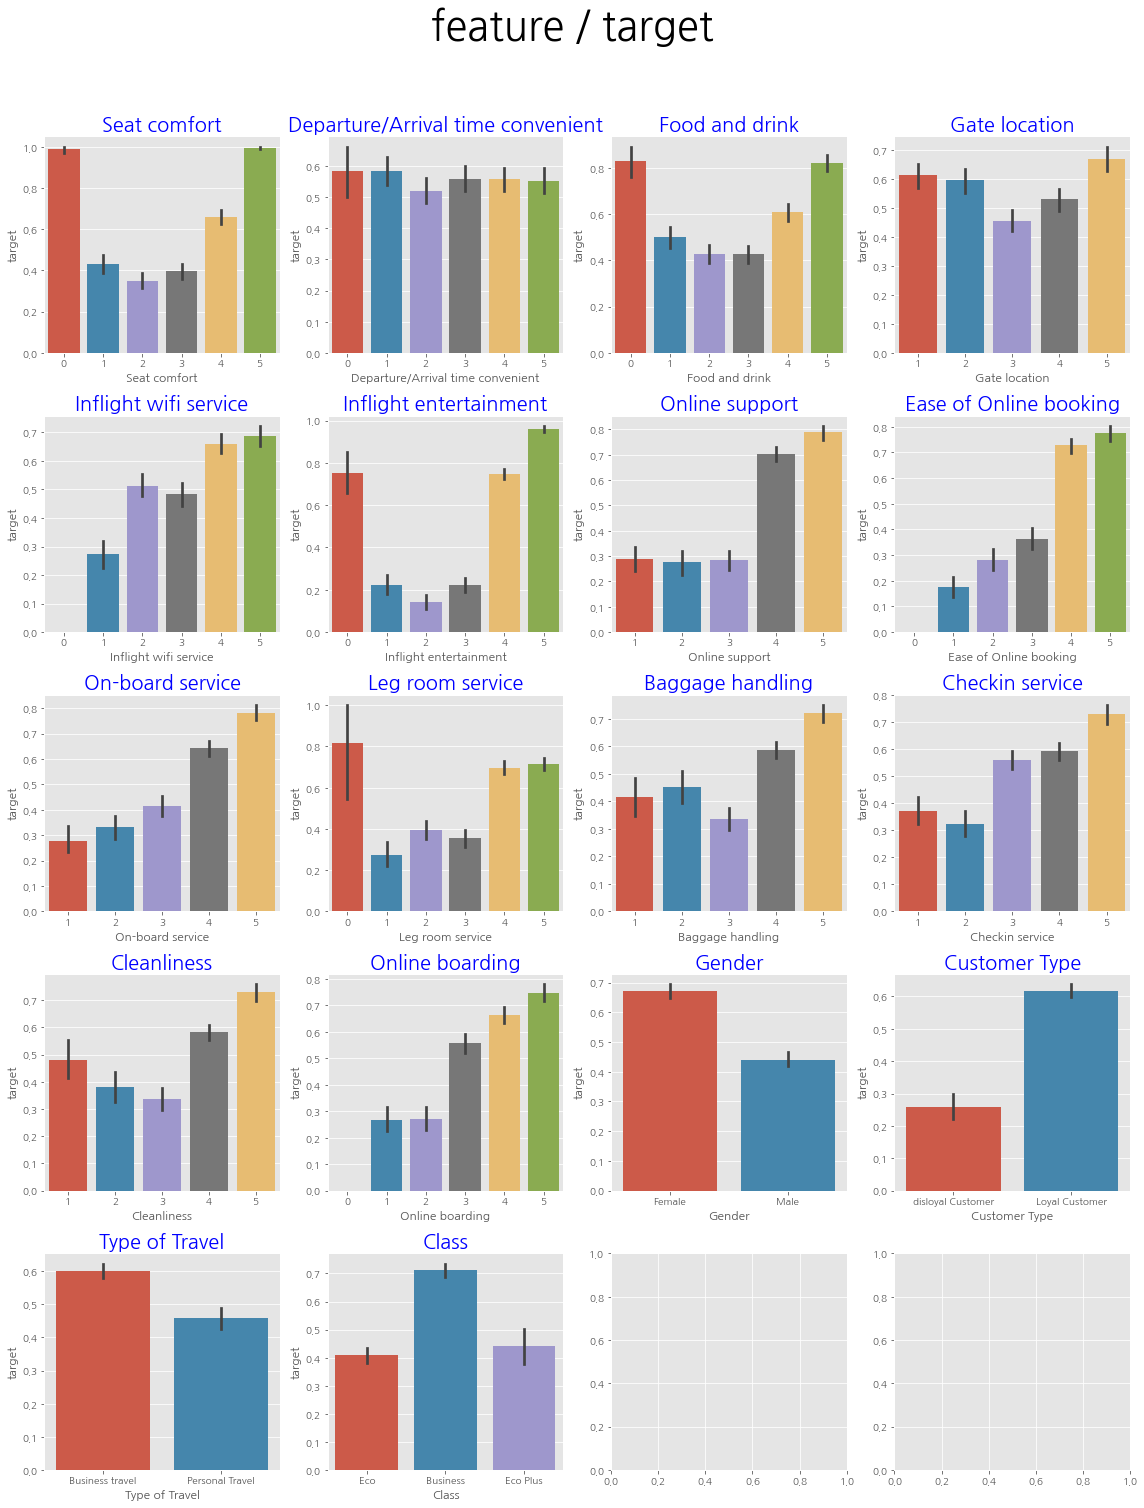

In [19]:
features_vs_target(train)

# 여기서 주목해야할 점은 0에서 5로 이루어진 ordinal feature 데이터에서 0의 의미입니다.
# 
0에서 5의 범위를 우리가 만족도라고 생각할 경우 0은 매우나쁨, 5는 매우좋음이라고 생각할 수 있습니다. 이때 그래프를 참고하면 5에 가까울수록 전체적인 만족도가 높았다는것을 의미하며 우리가 구해야 할 target, 즉 만족을 하여 1값이 나올 확률이 높다는 것입니다.  
# 

그렇다면 0에 가까워질수록 target이 1이 될 확률이 낮아지고, 5에 가까워질수록 target이 1이 될 확률이 높아져야 합니다. 하지만 그래프에서 1에서 5에 해당하는 부분은 예상처럼 값이 증가할수록 target의 확률이 높아지는 양상을 보이고 있지만, ***0의 경우에는 위에서 확인한것처럼 설문한 데이터의 수가 매우 적을뿐더러 어떨때는 만족도가 5일때보다 target의 확률이 높은 모습을 보여주고 있습니다.(편차도 매우 심합니다)***
# 
그렇다면 1~5의 값을 매우나쁨 나쁨 보통 좋음 매우좋음 / 이 다섯개로 분류할 경우 0값이 의미하는 것이 무엇인가에 대한 의문에 도달합니다. ***여기서 저는 0이 누락된 결측치나, 설문하지 않은 값을 모두 Nan 대신 0이라는 값으로 채워넣었다는 결론에 도달하게 되었습니다.***
# 
결론적으로 0을 데이터의 양이 적다고 1에 합치거나, 0~5로 label encoding을 하여 순서를 부여할 경우 학습에 안좋은 영향을 끼칠 수 있습니다.
# 
따라서 만약 0값이 포함된 ordinal feature로 학습을 진행한다면 label encoding보다는 one-hot encoding을 이용하여 0에 의미를 부여하지 않는 것이 중요해 보입니다.



### 0의 의미를 이렇게 볼 수 있다는 것을 배워갑니다!

# 데이터 정제하기

데이터 정제에서 진행할 작업은 크게 세가지
- 데이터 훑어보기 단계에서 얻은 insight을 바탕으로 데이터 정제하기
- 새로운 feature 만들기
- 데이터 제거하기

## 데이터 훑어보기 단계에서 얻은 insight을 바탕으로 데이터 정제하기
### 1.Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 그래프가 왼쪽으로 치우쳐져 있다는 점

log 변환을 이용하여 치우쳐진 정도를 줄여보기 (치우쳐진 정도 = skewness, 왜도)

In [20]:
for xstr in numeric_features:
    print(f"{xstr} Scew : {train[xstr].skew()}")

Age Scew : 0.0010456925943488839
Flight Distance Scew : 0.4509930169224059
Departure Delay in Minutes Scew : 9.190139679910239
Arrival Delay in Minutes Scew : 8.887761727831762


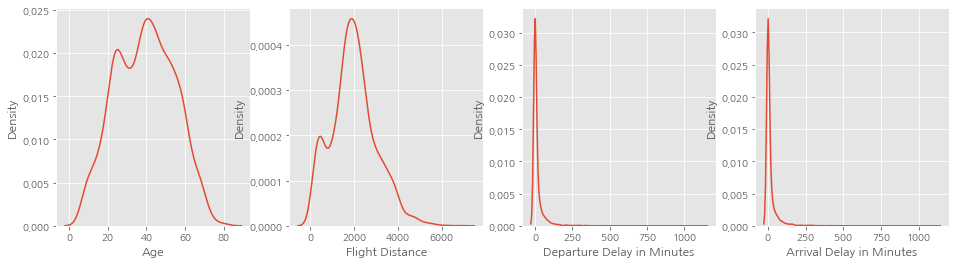

In [21]:
fig, ax = plt.subplots(1,4,figsize = (16,4))

for xint in range(4):
    
    sns.kdeplot(x = numeric_features[xint], data = train, ax = ax[xint])

Departure Delay in Minutes, Arrival Delay in Minutes는 한쪽으로 치우쳐진게 보임. 이들은 log변환

In [22]:
#  log 변환

train_df = train.copy()
test_df = test.copy()

train_df["Departure Delay in Minutes"] = np.log1p(train_df["Departure Delay in Minutes"])
train_df["Arrival Delay in Minutes"] = np.log1p(train_df["Arrival Delay in Minutes"])

test_df["Departure Delay in Minutes"] = np.log1p(test_df["Departure Delay in Minutes"])
test_df["Arrival Delay in Minutes"] = np.log1p(test_df["Arrival Delay in Minutes"])

In [23]:
for xstr in numeric_features:
    print(f"{xstr} Scew : {train_df[xstr].skew()}")

Age Scew : 0.0010456925943488839
Flight Distance Scew : 0.4509930169224059
Departure Delay in Minutes Scew : 0.9302111175258293
Arrival Delay in Minutes Scew : 0.8979015577156512


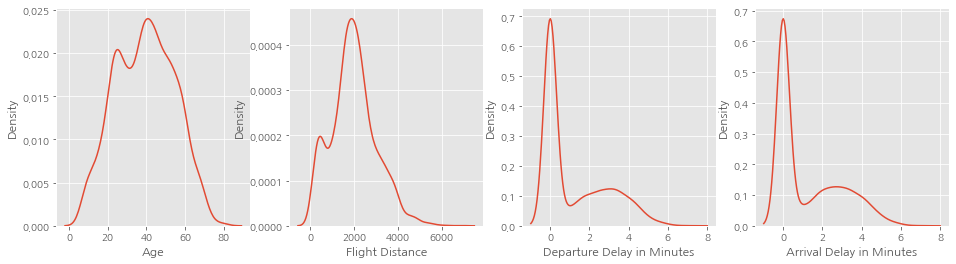

In [24]:
fig, ax = plt.subplots(1,4,figsize = (16,4))

for xint in range(4):
    
    sns.kdeplot(x = numeric_features[xint], data = train_df, ax = ax[xint])

### 2. Leg room sevice 등 1 ~ 5를 가진 feature들 중에서 0값은 Null값, 결측치 이다.

# 
 여기서 결측치라는 것을 인지하고, 대치하지 않는 방법도 있음. 그렇지만 결측치를 대치하여 최대한 복원해보는 과정도 있음.  
 여기서는 복원해보는 과정 선택  
 결측치가 적다면 결측치를 대치하여 데이터 복구를 시도, 결측치가 많다면 0은 그대로 놔둔 후 원핫인코딩 이용  
 1 ~ 5 값을 가진 범주형 데이터 결측치를 대치하기 위해 딥러닝 기반의 datawig 라이브러리 사용  
 datawig 말고도 다양한 데이터 결측치 대치 방법을 이용하여 복구 시도해 볼 수 있음!

In [25]:
print("Train 데이터 결측치")

for feature in ordinal_features:
    if len(train_df[train_df[feature] == 0]) > 0 :
        print(feature, len(train_df[train_df[feature] == 0]))
        

print("--" * 20)

print("Test 데이터 결측치")

for feature in ordinal_features:
    if len(test_df[test_df[feature] == 0]) > 0:
        print(feature, len(test_df[test_df[feature] == 0]))

Train 데이터 결측치
Seat comfort 106
Departure/Arrival time convenient 154
Food and drink 129
Inflight wifi service 2
Inflight entertainment 73
Ease of Online booking 1
Leg room service 11
Online boarding 1
----------------------------------------
Test 데이터 결측치
Seat comfort 64
Departure/Arrival time convenient 90
Food and drink 80
Inflight wifi service 1
Inflight entertainment 39
Leg room service 10


## 여기서 결측치 개수가 20개 이하로 적은 피쳐들만 datawig를 이용하여 대치한 결과가 가장 좋았다고 하심!   
##### 
train 데이터에서 Ease of Online booking, Online boarding은 결측치가 1개이므로 train데이터에서 간단하게 수정  

In [26]:
corr_matrix = train_df.corr()
corr_matrix["Online boarding"].sort_values(ascending=False)[:5]

Online boarding           1.000000
Ease of Online booking    0.684511
Online support            0.675139
Inflight wifi service     0.632049
Inflight entertainment    0.353772
Name: Online boarding, dtype: float64

In [27]:
train_df["Ease of Online booking"][train_df["Ease of Online booking"] == 0] = 3
train_df["Online boarding"][train_df["Online boarding"] == 0] = 3

In [28]:
for i in range(len(train_df)):
    for feature in ordinal_features:
        if train_df[feature].iloc[i] == 0:
            train_df[feature].iloc[i] = np.nan

for i in range(len(test_df)):
    for feature in ordinal_features:
        if test_df[feature].iloc[i] == 0:
            test_df[feature].iloc[i] = np.nan

In [29]:
corr_matrix = train_df.corr()
corr_matrix["Inflight wifi service"].sort_values(ascending=False)[:5]

Inflight wifi service     1.000000
Online boarding           0.630754
Ease of Online booking    0.602117
Online support            0.562900
Inflight entertainment    0.290907
Name: Inflight wifi service, dtype: float64

In [30]:
import datawig

target_feature = "Inflight wifi service"

imputer = datawig.SimpleImputer(input_columns=['Online boarding', 'Ease of Online booking', 'Online support'],
                                output_column=target_feature)
imputer.fit(train_df=train_df, num_epochs=50)

null_train = train_df[train_df[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(train_df)):
    if np.isnan(train_df[target_feature].iloc[i]) == True:
        train_df[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1
        
null_train = test_df[test_df[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(test_df)):
    if np.isnan(test_df[target_feature].iloc[i]) == True:
        test_df[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1

2022-02-15 00:01:21,957 [INFO]  
========== start: fit model
2022-02-15 00:01:21,958 [WARNING]  Already bound, ignoring bind()
2022-02-15 00:01:22,022 [INFO]  Epoch[0] Batch [0-85]	Speed: 22297.57 samples/sec	cross-entropy=10.388260	Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:22,083 [INFO]  Epoch[0] Train-cross-entropy=9.292808
2022-02-15 00:01:22,084 [INFO]  Epoch[0] Train-Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:22,084 [INFO]  Epoch[0] Time cost=0.124
2022-02-15 00:01:22,088 [INFO]  Saved checkpoint to "inflight_wifi_service\model-0000.params"
2022-02-15 00:01:22,095 [INFO]  Epoch[0] Validation-cross-entropy=10.365005
2022-02-15 00:01:22,096 [INFO]  Epoch[0] Validation-Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:22,168 [INFO]  Epoch[1] Batch [0-85]	Speed: 19952.41 samples/sec	cross-entropy=8.679467	Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:22,233 [INFO]  Epoch[1] Train-cross-entropy=8.331298
2022-02-15 00:01:22,234 [INFO]  Epoc

2022-02-15 00:01:23,787 [INFO]  Epoch[13] Batch [0-85]	Speed: 25679.45 samples/sec	cross-entropy=8.036512	Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:23,840 [INFO]  Epoch[13] Train-cross-entropy=7.648539
2022-02-15 00:01:23,840 [INFO]  Epoch[13] Train-Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:23,841 [INFO]  Epoch[13] Time cost=0.107
2022-02-15 00:01:23,852 [INFO]  Saved checkpoint to "inflight_wifi_service\model-0013.params"
2022-02-15 00:01:23,858 [INFO]  Epoch[13] Validation-cross-entropy=9.355770
2022-02-15 00:01:23,859 [INFO]  Epoch[13] Validation-Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:23,914 [INFO]  Epoch[14] Batch [0-85]	Speed: 25303.99 samples/sec	cross-entropy=8.021984	Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:23,966 [INFO]  Epoch[14] Train-cross-entropy=7.631500
2022-02-15 00:01:23,967 [INFO]  Epoch[14] Train-Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:23,967 [INFO]  Epoch[14] Time cost=0.108
2022-02-15 

2022-02-15 00:01:25,385 [INFO]  Epoch[26] Train-cross-entropy=7.512641
2022-02-15 00:01:25,386 [INFO]  Epoch[26] Train-Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:25,386 [INFO]  Epoch[26] Time cost=0.108
2022-02-15 00:01:25,391 [INFO]  Saved checkpoint to "inflight_wifi_service\model-0026.params"
2022-02-15 00:01:25,396 [INFO]  Epoch[26] Validation-cross-entropy=9.279543
2022-02-15 00:01:25,397 [INFO]  Epoch[26] Validation-Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:25,455 [INFO]  Epoch[27] Batch [0-85]	Speed: 24341.58 samples/sec	cross-entropy=7.904626	Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:25,512 [INFO]  Epoch[27] Train-cross-entropy=7.508669
2022-02-15 00:01:25,513 [INFO]  Epoch[27] Train-Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:25,513 [INFO]  Epoch[27] Time cost=0.116
2022-02-15 00:01:25,517 [INFO]  Saved checkpoint to "inflight_wifi_service\model-0027.params"
2022-02-15 00:01:25,523 [INFO]  Epoch[27] Validation-cross-entr

2022-02-15 00:01:27,047 [INFO]  Epoch[39] Train-Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:27,048 [INFO]  Epoch[39] Time cost=0.108
2022-02-15 00:01:27,052 [INFO]  Saved checkpoint to "inflight_wifi_service\model-0039.params"
2022-02-15 00:01:27,058 [INFO]  Epoch[39] Validation-cross-entropy=9.278112
2022-02-15 00:01:27,059 [INFO]  Epoch[39] Validation-Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:27,115 [INFO]  Epoch[40] Batch [0-85]	Speed: 25399.54 samples/sec	cross-entropy=7.845050	Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:27,168 [INFO]  Epoch[40] Train-cross-entropy=7.444402
2022-02-15 00:01:27,169 [INFO]  Epoch[40] Train-Inflight wifi service-accuracy=0.000000
2022-02-15 00:01:27,170 [INFO]  Epoch[40] Time cost=0.111
2022-02-15 00:01:27,173 [INFO]  Saved checkpoint to "inflight_wifi_service\model-0040.params"
2022-02-15 00:01:27,180 [INFO]  Epoch[40] Validation-cross-entropy=9.266966
2022-02-15 00:01:27,180 [INFO]  Epoch[40] Validation-Infli

In [31]:
corr_matrix = train_df.corr()
corr_matrix["Inflight wifi service"].sort_values(ascending=False)[:5]

Inflight wifi service     1.000000
Online boarding           0.630527
Ease of Online booking    0.602079
Online support            0.562687
Inflight entertainment    0.290797
Name: Inflight wifi service, dtype: float64

In [32]:
import datawig

target_feature = "Leg room service"

imputer = datawig.SimpleImputer(input_columns=['Baggage handling', 'On-board service', 'Cleanliness'],
                                output_column=target_feature)
imputer.fit(train_df=train_df, num_epochs=50)

null_train = train_df[train_df[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(train_df)):
    if np.isnan(train_df[target_feature].iloc[i]) == True:
        train_df[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1
        
null_train = test_df[test_df[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(test_df)):
    if np.isnan(test_df[target_feature].iloc[i]) == True:
        test_df[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1

In [33]:
for feature in ordinal_features:
    if train_df[feature].isnull().sum() > 0:
        print(feature, train_df[feature].isnull().sum())
print("================")
for feature in ordinal_features:
    if test_df[feature].isnull().sum() > 0:
        print(feature, test_df[feature].isnull().sum())

Seat comfort 106
Departure/Arrival time convenient 154
Food and drink 129
Inflight entertainment 73
Seat comfort 64
Departure/Arrival time convenient 90
Food and drink 80
Inflight entertainment 39


In [34]:
train_df['Delayed'] = (train_df['Departure Delay in Minutes'] 
                         + train_df['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)
test_df['Delayed'] = (test_df['Departure Delay in Minutes'] 
                         + test_df['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)

In [35]:
corr_matrix = train_df.corr()
corr_matrix["target"].sort_values(ascending=False)

target                               1.000000
Inflight entertainment               0.601695
Ease of Online booking               0.447450
Online support                       0.411944
Seat comfort                         0.372013
On-board service                     0.359699
Online boarding                      0.350895
Leg room service                     0.320374
Checkin service                      0.248975
Inflight wifi service                0.241221
Cleanliness                          0.234848
Baggage handling                     0.232302
Food and drink                       0.219507
Age                                  0.107226
Delayed                              0.097188
id                                   0.007544
Gate location                        0.003213
Departure/Arrival time convenient   -0.005230
Flight Distance                     -0.052059
Departure Delay in Minutes          -0.105554
Arrival Delay in Minutes            -0.142003
Name: target, dtype: float64

In [36]:
train_df = train_df.drop(columns = ['Food and drink', 'Departure/Arrival time convenient', 'Departure Delay in Minutes','id'], axis = 1)
test_df = test_df.drop(columns = ['Food and drink', 'Departure/Arrival time convenient', 'Departure Delay in Minutes','id'], axis = 1)

# 모델 학습하기

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import train_test_split

In [48]:
X_train = train_df.drop(columns = ["target"], axis = 1)
X_train = pd.get_dummies(X_train)
X_train.fillna(X_train.mean(), inplace = True)




y_train = train_df.target

X_test = test_df.copy()
X_test = pd.get_dummies(X_test)
X_test.fillna(X_test.mean(), inplace = True)

In [50]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

In [51]:
submission["target"] = prediction
submission.to_csv("second_original.csv",index = False)

In [52]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)


X_train = ss.transform(X_train)
X_test = ss.transform(X_test)


In [53]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

submission["target"] = prediction
submission.to_csv("second_ss.csv",index = False)